In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def ReadData(fileName):
    f = open(fileName)
    content = np.asarray([i.split() for i in f.readlines()], dtype='float')
    X = np.insert(content[:, :-1], 0, 1, axis=1)
    Y = content[:, -1:].reshape(content.shape[0])
    
    f.close()
    return X, Y

In [4]:
x, y = ReadData("hw3_train.dat.txt")
print(x)

[[1.       0.57548  0.53938  ... 0.38317  0.35514  0.39439 ]
 [1.       0.70727  0.88503  ... 0.39012  0.68854  0.077076]
 [1.       0.24443  0.27331  ... 0.52541  0.93579  0.69411 ]
 ...
 [1.       0.18265  0.021352 ... 0.030984 0.99831  0.13292 ]
 [1.       0.27829  0.66993  ... 0.79203  0.76995  0.93146 ]
 [1.       0.9796   0.47349  ... 0.16425  0.24958  0.46893 ]]


In [5]:
def Sign(s):
    return (s>=0) and 1 or -1

def Sigmoid(s):
    return 1/(1+np.exp(-s))

def GetGradient(W, X, Y):
    grad = np.zeros(len(W))
    for i in range(len(X)):
        sigmoid = Sigmoid(-1*Y[i]*np.inner(W, X[i]))
        grad += sigmoid*-1*Y[i]*X[i]
    
    return grad/len(X)

def Update_STD(W, X, Y, lr, i):
    grad = GetGradient(W, [X[i]], [Y[i]])
    W = W - lr*grad
    
    return W

def Update(W, X, Y, lr):
    grad = GetGradient(W, X, Y)
    W = W - lr*grad
    
    return W

def GetError(W, X, Y):
    y_hat = np.sign(np.inner(W, X))
    error = np.sum(y_hat != Y)/len(X)
    
    return error

## 7

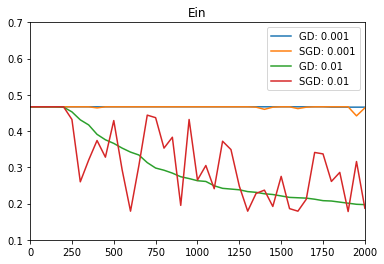

In [33]:
train_X, train_y = ReadData("hw3_train.dat.txt")
test_X, test_y = ReadData("hw3_test.dat.txt")

learning_rate = 0.01
epoch = 2000

times = range(0,2001, 50)
for lr in [0.001,0.01]:
    W1 = np.zeros(train_X.shape[1])
    W2 = np.zeros(train_X.shape[1])
    E_in_1 = []
    E_in_2 = []
    for i in range(epoch):
        W1 = Update(W1, train_X, train_y, lr)
        W2 = Update_STD(W2, train_X, train_y, lr, i%train_X.shape[0])

        ## Count Ein
        if (i%50 == 0):
            E_in_1.append(GetError(W1, train_X, train_y))
            E_in_2.append(GetError(W2, train_X, train_y))
    E_in_1.append(GetError(W1, train_X, train_y))
    E_in_2.append(GetError(W2, train_X, train_y))
    plt.plot(times, E_in_1, label="GD: {}".format(lr))
    plt.plot(times, E_in_2, label="SGD: {}".format(lr))
    
plt.axis((0,2000,0.1,0.7))
plt.title("Ein")
plt.legend()
plt.savefig("/home/mj/HardDisk/Github/NTU/Classes/Machine_Learning/HW_3/7.png")
plt.show()

## 8

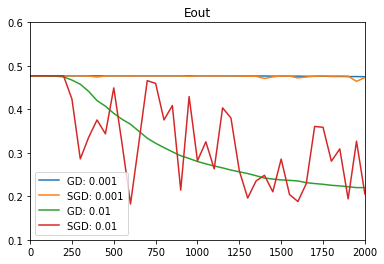

In [34]:
train_X, train_y = ReadData("hw3_train.dat.txt")
test_X, test_y = ReadData("hw3_test.dat.txt")

learning_rate = 0.001
epoch = 2000

times = range(0,2001, 50)
for lr in [0.001,0.01]:
    W1 = np.zeros(train_X.shape[1])
    W2 = np.zeros(train_X.shape[1])
    E_out_1 = []
    E_out_2 = []
    for i in range(epoch):
        W1 = Update(W1, train_X, train_y, lr)
        W2 = Update_STD(W2, train_X, train_y, lr, i%train_X.shape[0])

        ## Count Ein
        if (i%50 == 0):
            E_out_1.append(GetError(W1, test_X, test_y))
            E_out_2.append(GetError(W2, test_X, test_y))
    E_out_1.append(GetError(W1, test_X, test_y))
    E_out_2.append(GetError(W2, test_X, test_y))
    plt.plot(times, E_out_1, label="GD: {}".format(lr))
    plt.plot(times, E_out_2, label="SGD: {}".format(lr))

plt.axis((0,2000,0.1,0.6))
plt.title("Eout")
plt.legend()
plt.savefig("/home/mj/HardDisk/Github/NTU/Classes/Machine_Learning/HW_3/8.png")
plt.show()